In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore', category=FutureWarning)

### Data Preprocessing

In [2]:
house = pd.read_csv("California House Price.csv")
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
# Handling missing values
house['total_bedrooms'].fillna(house['total_bedrooms'].median(), inplace=True)

In [7]:
# Kolom yang akan ditransformasi logaritmik
#logtransform = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [8]:
# Menerapkan transformasi logaritmik pada kolom tertentu
#house[logtransform] = house[logtransform].apply(lambda x: np.log(x + 1))

In [9]:
# Normalization using Min-Max Scaling
scaler = MinMaxScaler()
numerical_cols = house.select_dtypes(include=['float64', 'int64']).columns
house[numerical_cols] = scaler.fit_transform(house[numerical_cols])

In [10]:
# Encoding for categorical data using one-hot encoding
house_encoded = pd.get_dummies(house, columns=['ocean_proximity'])

In [11]:
# Cek apakah ada nilai NaN dalam data
print("Cek nilai NaN sebelum pemodelan:")
print(house_encoded.isna().sum())

Cek nilai NaN sebelum pemodelan:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


### Data Visualization

Text(0.5, 1.0, 'Correlation Heatmap')

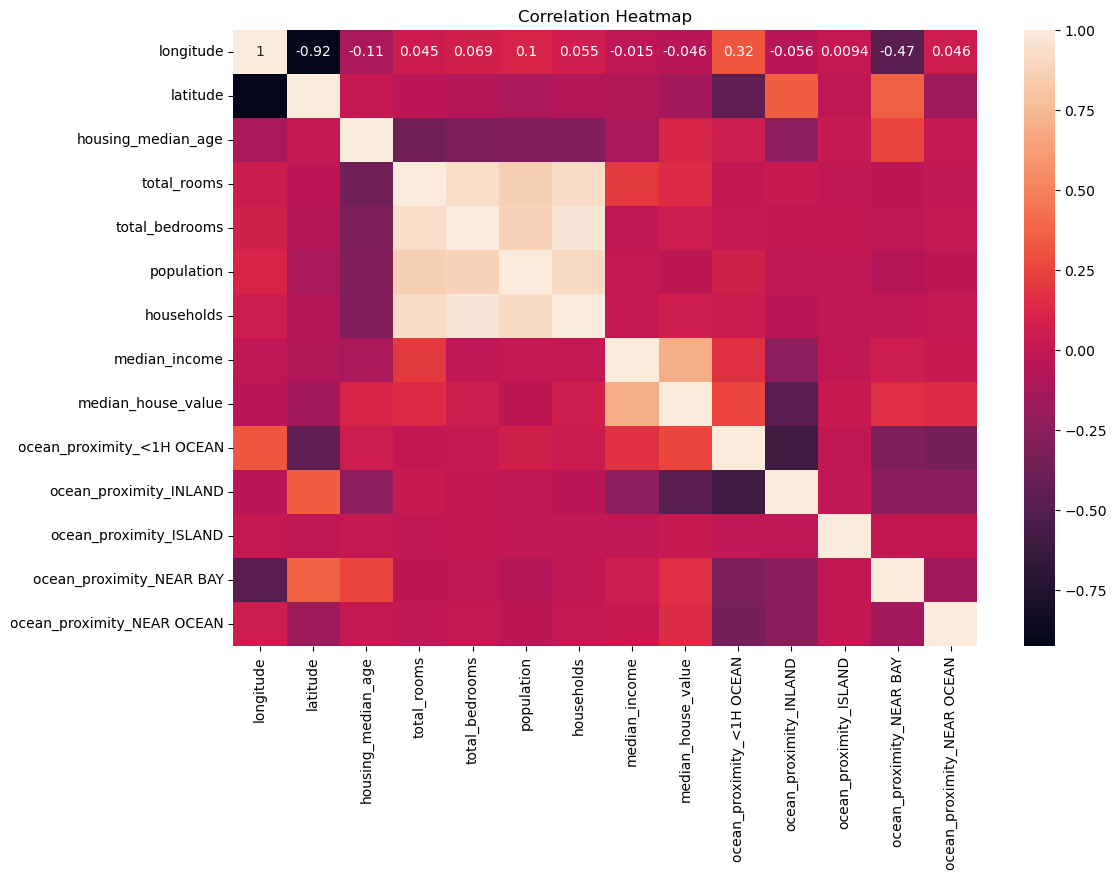

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(house_encoded.corr(), annot=True)
plt.title('Correlation Heatmap')

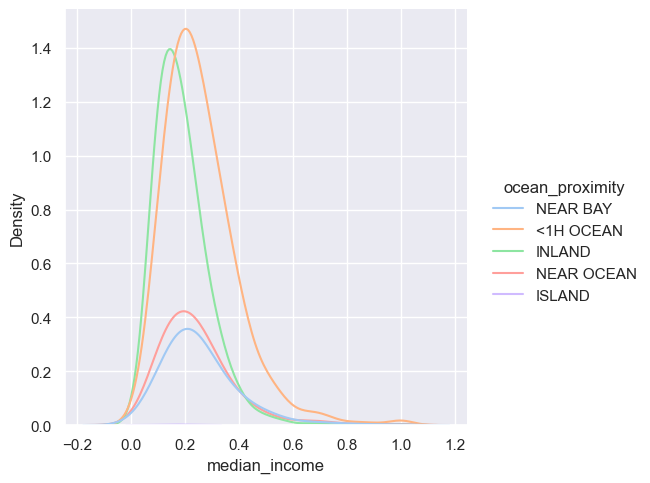

In [13]:
sns.set(rc={'figure.figsize': (20, 8)})
sns.displot(data=house, x='median_income', hue='ocean_proximity', kind="kde", palette="pastel", bw_adjust=2)

<Axes: xlabel='median_income', ylabel='median_house_value'>

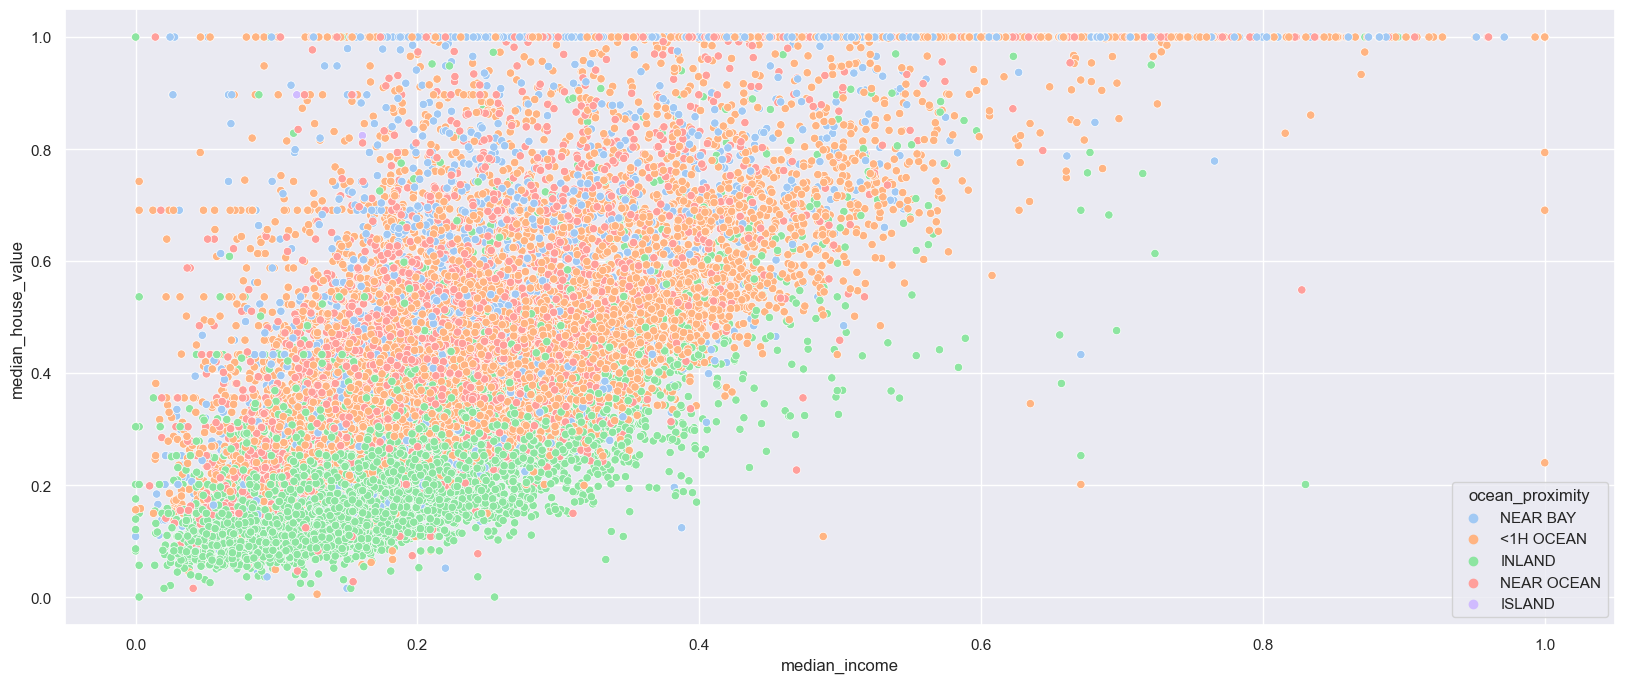

In [14]:
# Scatter Plot of Median Income vs Median House Value
sns.scatterplot(data=house,
                x="median_income",
                y="median_house_value",
                hue="ocean_proximity", 
                palette="pastel")

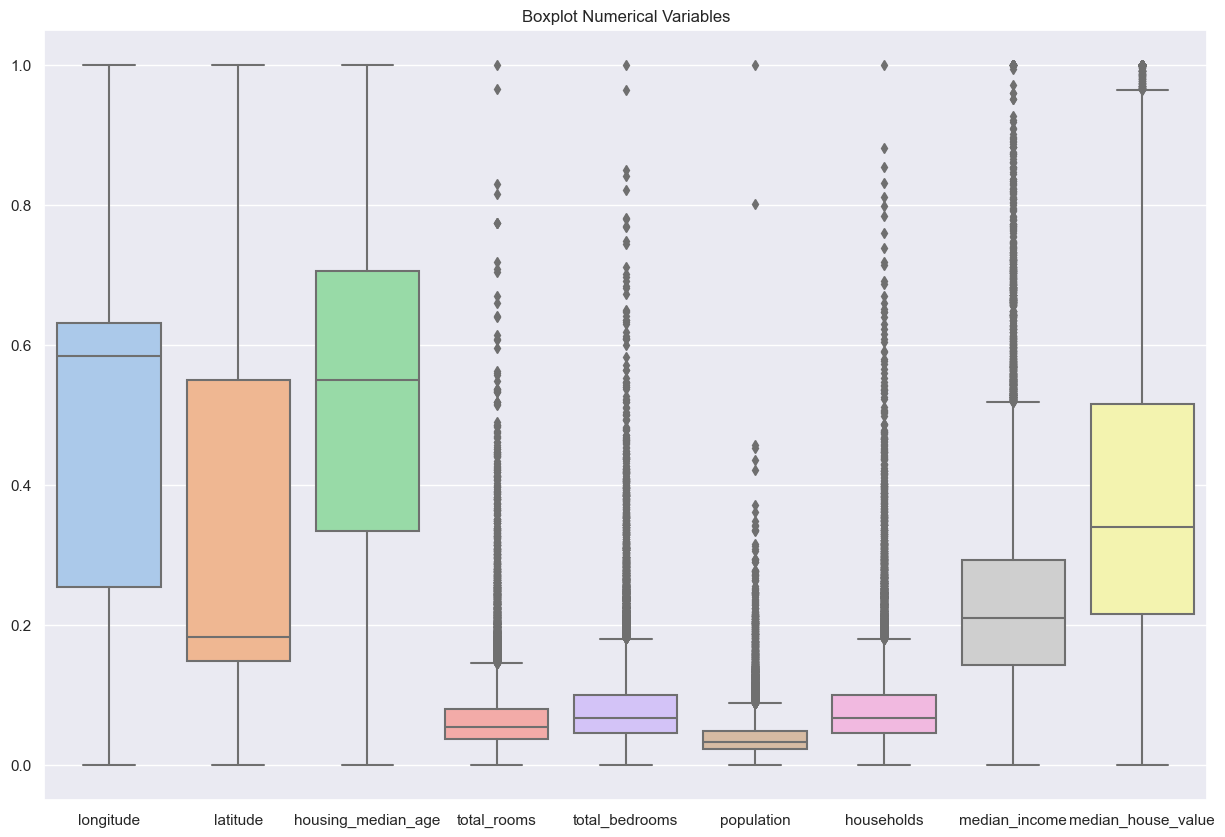

In [15]:
# Boxplot for all numerical columns after preprocessing
plt.figure(figsize=(15, 10))
sns.boxplot(data=house_encoded[numerical_cols], palette="pastel")
plt.title('Boxplot Numerical Variables')
plt.show()

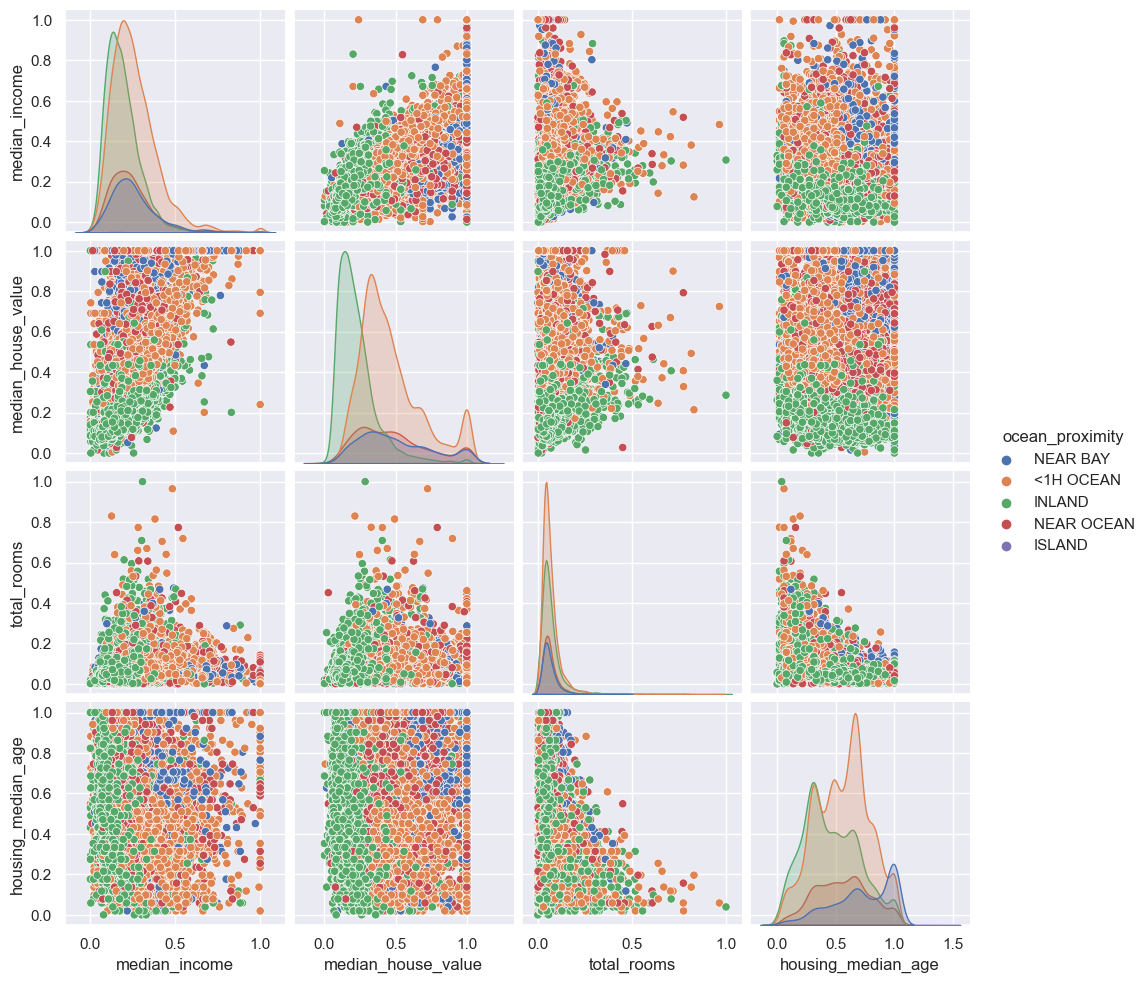

In [16]:
# Pairplot for selected columns
sns.pairplot(house, vars=['median_income', 'median_house_value', 'total_rooms', 'housing_median_age'], hue='ocean_proximity')
plt.show()

### Data Modelling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target variable
X = house_encoded.drop('median_house_value', axis=1)
y = house_encoded['median_house_value']

In [18]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Membuat prediksi dengan model
y_pred = linear_model.predict(X_test)

In [21]:
# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.02086126059825251
R-squared: 0.6255267953261194


In [22]:
# Hitung error
error = y_test - y_pred

In [23]:
# Kategorisasi error
error_categories = pd.cut(error, bins=5, labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

In [24]:
# Buat DataFrame untuk visualisasi
plot_data = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred, 'Error Category': error_categories})

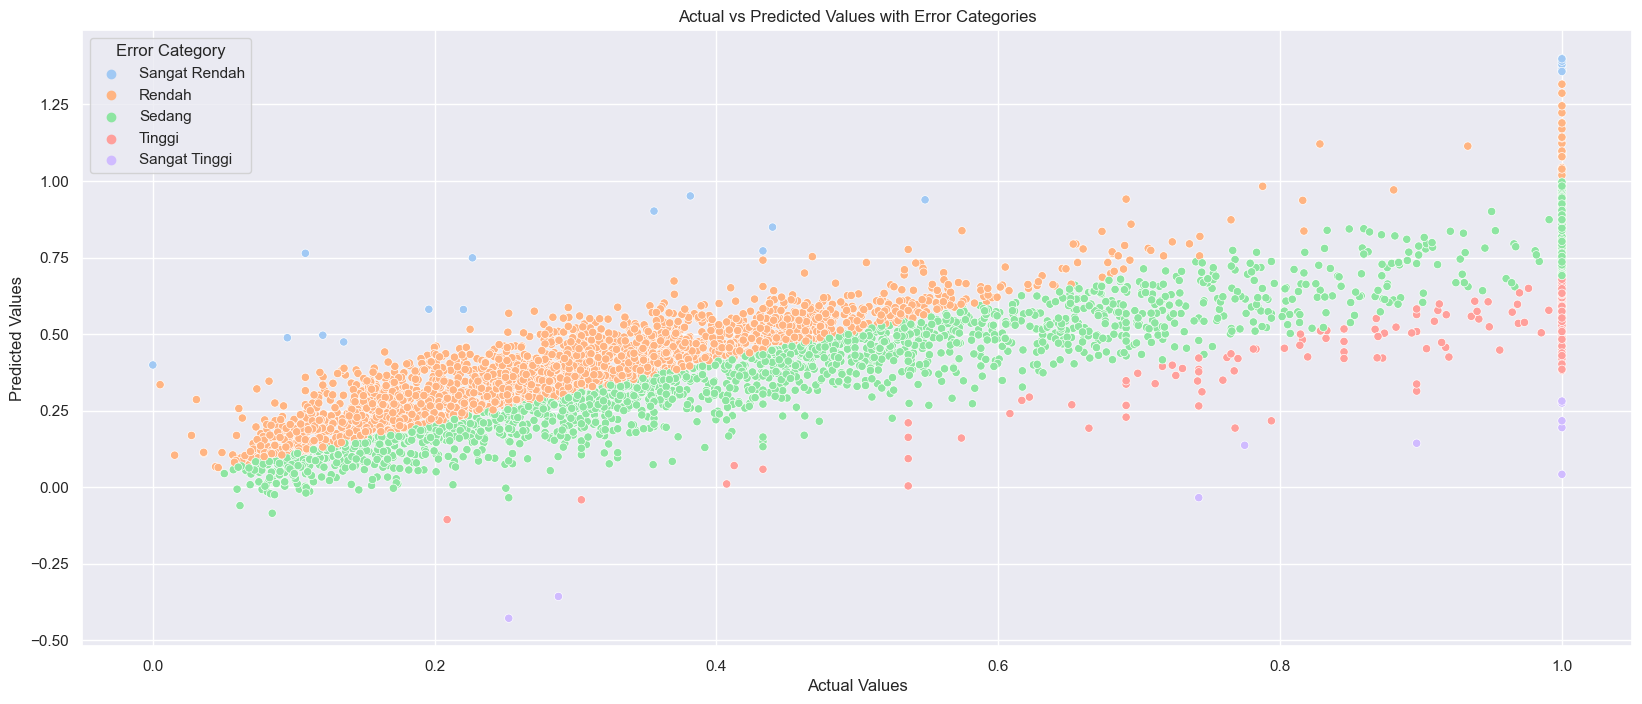

In [25]:
# Visualisasi dengan seaborn scatterplot
sns.scatterplot(data=plot_data, x='Actual Values', y='Predicted Values', hue='Error Category', palette='pastel')
plt.title("Actual vs Predicted Values with Error Categories")
plt.show()

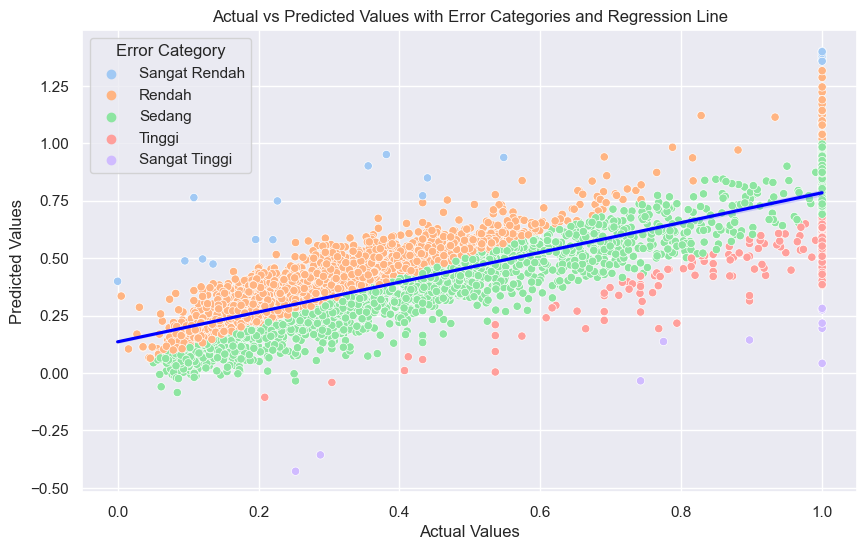

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='Actual Values', y='Predicted Values', hue='Error Category', palette='pastel')

# Menambahkan garis regresi linear pada scatter plot yang sama
sns.regplot(x='Actual Values', y='Predicted Values', data=plot_data, scatter=False, color='blue')

plt.title("Actual vs Predicted Values with Error Categories and Regression Line")
plt.show()


In [27]:
X 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,False,False,False,True,False
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,False,False,False,True,False
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,False,False,False,True,False
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,False,False,False,True,False
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,False,True,False,False,False
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,False,True,False,False,False
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,False,True,False,False,False
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,False,True,False,False,False
